## Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import statsmodels.api as sm
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing

> INFOSYS Stock



In [ ]:
# Step 1: Read both files
file1 = pd.read_csv('/content/drive/My Drive/CAPM_Project/Final_Datasets/Infosys/CAPM_Dataset_INFOSYS.csv')
file2 = pd.read_csv('/content/drive/My Drive/CAPM_Project/2025-03_FourFactors_and_Market_Returns_Monthly_SurvivorshipBiasAdjusted.csv')

# Step 2: Convert 'Date' columns to datetime format
file1['Date'] = pd.to_datetime(file1['Date'])
file2['Date'] = pd.to_datetime(file2['Date'].astype(str) + '-01')  # e.g., '1990-01' → '1990-01-01'

# Step 3: Filter file2 by date range
start_date = '2012-03-01'
end_date = '2025-03-01'
file2_filtered = file2[(file2['Date'] >= start_date) & (file2['Date'] <= end_date)]

# Step 4: Select 2 specific columns and divide them by 100
columns_to_use = ['SMB', 'HML']  # Change to your actual column names
file2_selected = file2_filtered[['Date'] + columns_to_use].copy()

for col in columns_to_use:
    file2_selected[col] = file2_selected[col] / 100



# Step 5: Merge with file1 on 'Date'
merged_df = pd.merge(file1, file2_selected, on='Date', how='inner')

save_path = "/content/drive/My Drive/FFF_Project/Final_Datasets/Infosys/FFF_Dataset_INFOSYS.csv"
# Step 6: Save the result to a new CSV
merged_df.to_csv(save_path, index=False)




> HDFCBANK Stock



In [ ]:
# Step 1: Read both files
file1 = pd.read_csv('/content/drive/My Drive/CAPM_Project/Final_Datasets/HDFC Bank/CAPM_Dataset_HDFC.csv')
file2 = pd.read_csv('/content/drive/My Drive/CAPM_Project/2025-03_FourFactors_and_Market_Returns_Monthly_SurvivorshipBiasAdjusted.csv')

# Step 2: Convert 'Date' columns to datetime format
file1['Date'] = pd.to_datetime(file1['Date'])
file2['Date'] = pd.to_datetime(file2['Date'].astype(str) + '-01')  # e.g., '1990-01' → '1990-01-01'

# Step 3: Filter file2 by date range
start_date = '2012-03-01'
end_date = '2025-03-01'
file2_filtered = file2[(file2['Date'] >= start_date) & (file2['Date'] <= end_date)]

# Step 4: Select 2 specific columns and divide them by 100
columns_to_use = ['SMB', 'HML']  # Change to your actual column names
file2_selected = file2_filtered[['Date'] + columns_to_use].copy()

for col in columns_to_use:
    file2_selected[col] = file2_selected[col] / 100



# Step 5: Merge with file1 on 'Date'
merged_df = pd.merge(file1, file2_selected, on='Date', how='inner')

save_path = "/content/drive/My Drive/FFF_Project/Final_Datasets/HDFC Bank/FFF_Dataset_HDFC.csv"
# Step 6: Save the result to a new CSV
merged_df.to_csv(save_path, index=False)



> RELIANCE Stock



In [ ]:
# Step 1: Read both files
file1 = pd.read_csv('/content/drive/My Drive/CAPM_Project/Final_Datasets/Reliance/CAPM_Dataset_RELI.csv')
file2 = pd.read_csv('/content/drive/My Drive/CAPM_Project/2025-03_FourFactors_and_Market_Returns_Monthly_SurvivorshipBiasAdjusted.csv')

# Step 2: Convert 'Date' columns to datetime format
file1['Date'] = pd.to_datetime(file1['Date'])
file2['Date'] = pd.to_datetime(file2['Date'].astype(str) + '-01')  # e.g., '1990-01' → '1990-01-01'

# Step 3: Filter file2 by date range
start_date = '2012-03-01'
end_date = '2025-03-01'
file2_filtered = file2[(file2['Date'] >= start_date) & (file2['Date'] <= end_date)]

# Step 4: Select 2 specific columns and divide them by 100
columns_to_use = ['SMB', 'HML']  # Change to your actual column names
file2_selected = file2_filtered[['Date'] + columns_to_use].copy()

for col in columns_to_use:
    file2_selected[col] = file2_selected[col] / 100



# Step 5: Merge with file1 on 'Date'
merged_df = pd.merge(file1, file2_selected, on='Date', how='inner')

save_path = "/content/drive/My Drive/FFF_Project/Final_Datasets/Reliance/FFF_Dataset_RELI.csv"
# Step 6: Save the result to a new CSV
merged_df.to_csv(save_path, index=False)

## Fit Fama_French Factor Model on Indian Stocks and Various Plots

> Infosys Stock





> Regression Fit



In [ ]:
df = pd.read_csv('/content/drive/My Drive/FFF_Project/Final_Datasets/Infosys/FFF_Dataset_INFOSYS.csv')


# Define X and y
X = df[['Excess_Market', 'SMB', 'HML']]
y = df['Excess_INFY']

# Add constant to estimate alpha (intercept)
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit(cov_type= 'HC1')

# Show regression summary
print(model.summary())

# Print each coefficient separately
print("Intercept (Alpha):", model.params['const'])
print("Market Factor (Beta for Excess_Market):", model.params['Excess_Market'])
print("Size Factor (Beta for SMB):", model.params['SMB'])
print("Value Factor (Beta for HML):", model.params['HML'])

                            OLS Regression Results                            
Dep. Variable:            Excess_INFY   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     12.73
Date:                Sun, 22 Jun 2025   Prob (F-statistic):           1.79e-07
Time:                        10:16:53   Log-Likelihood:                 197.82
No. Observations:                 157   AIC:                            -387.6
Df Residuals:                     153   BIC:                            -375.4
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0062      0.005      1.168



> Barplot of Model Coefficients



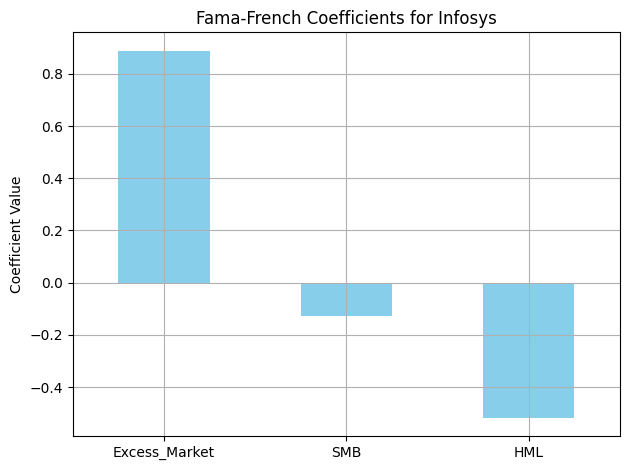

In [ ]:
model.params[['Excess_Market', 'SMB', 'HML']].plot(kind='bar', color='skyblue', title='Fama-French Coefficients for Infosys')
plt.ylabel("Coefficient Value")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()




> Scatter Plot of Residuals Vs Fama-French Factors



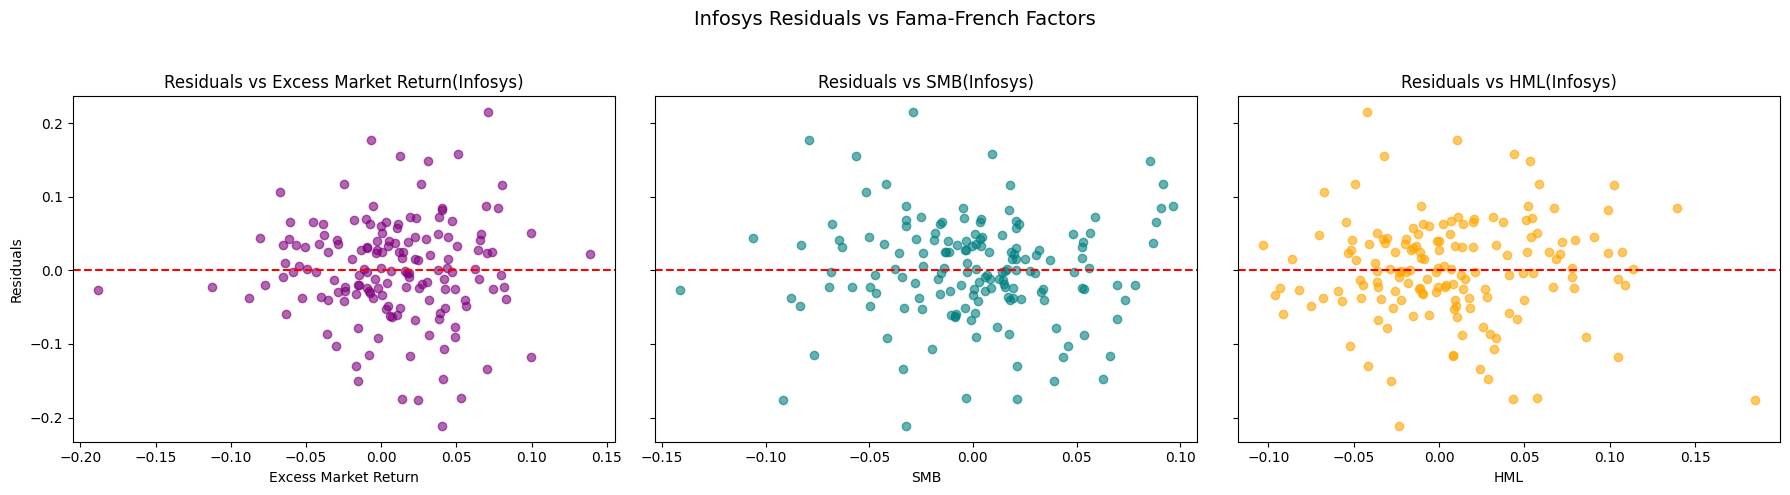

In [ ]:
# Step 1: Predict Infosys excess return using the model
df['Predicted_Excess_INFY'] = model.predict(X)

# Step 2: Calculate residuals
df['Residuals'] = y - df['Predicted_Excess_INFY']

# Step 3: Plot residuals vs Excess Market Return

# Step 1: Set up figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot 1: Excess Market Return vs Residuals
axs[0].scatter(X['Excess_Market'], df['Residuals'], color='purple', alpha=0.6)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title('Residuals vs Excess Market Return(Infosys)')
axs[0].set_xlabel('Excess Market Return')
axs[0].set_ylabel('Residuals')

# Plot 2: SMB vs Residuals
axs[1].scatter(X['SMB'], df['Residuals'], color='teal', alpha=0.6)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs SMB(Infosys)')
axs[1].set_xlabel('SMB')

# Plot 3: HML vs Residuals
axs[2].scatter(X['HML'], df['Residuals'], color='orange', alpha=0.6)
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_title('Residuals vs HML(Infosys)')
axs[2].set_xlabel('HML')

# Final adjustments
plt.suptitle("Infosys Residuals vs Fama-French Factors", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



> Scatter Plot of Residuals Vs Predicted Excess Return



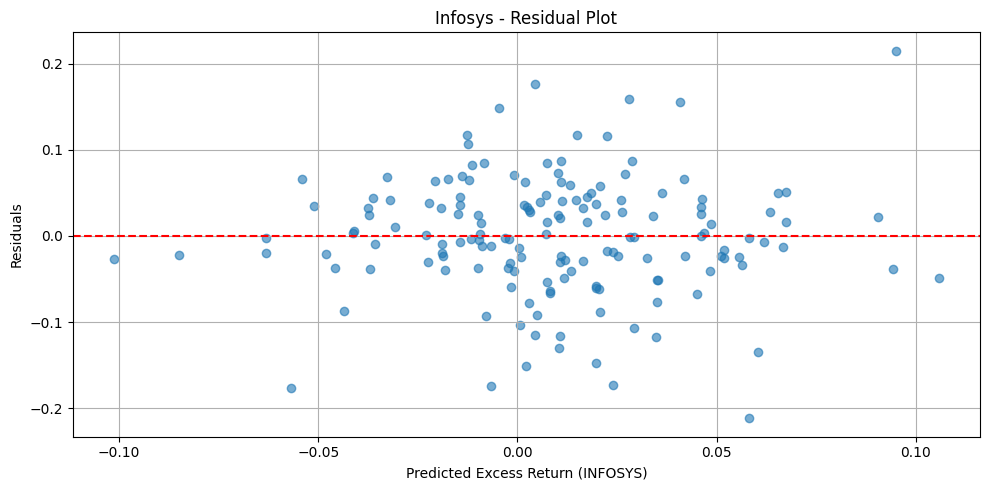

In [ ]:
# residuals = df['Excess_Infosys'] - df['Predicted_Excess']

plt.figure(figsize=(10,5))
plt.scatter(df['Predicted_Excess_INFY'], df['Residuals'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Infosys - Residual Plot")
plt.xlabel("Predicted Excess Return (INFOSYS)")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()



> Histogram of Residuals



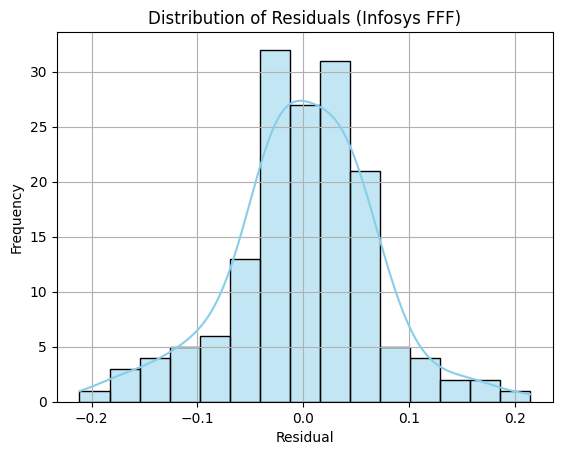

In [ ]:
sns.histplot(df['Residuals'], kde=True, color='skyblue')
plt.title("Distribution of Residuals (Infosys FFF)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



> Line Plot of Residuals Over Times



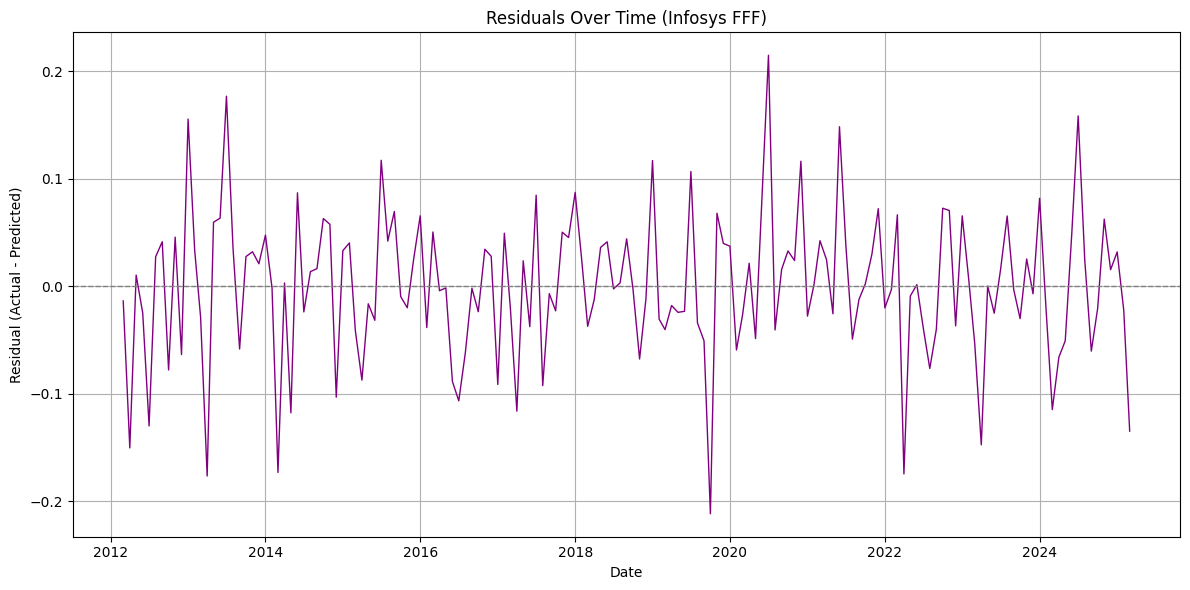

In [ ]:
# Convert 'Date' to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date just in case
df = df.sort_values('Date')

# Plot residuals over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Residuals'], color='purple', linewidth=1)

# Add zero line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and formatting
plt.title("Residuals Over Time (Infosys FFF)")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Line Plot of Actual Vs Predicted Excess Returns



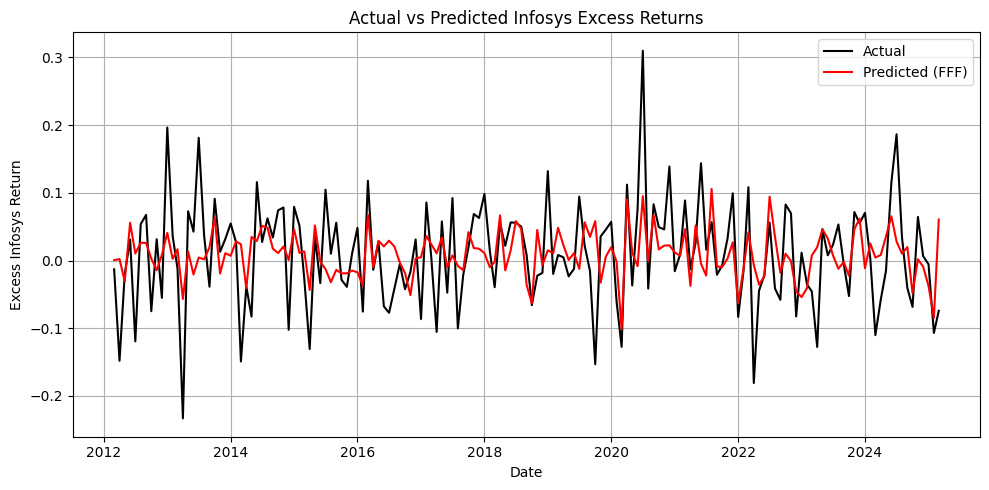

In [ ]:
df['Predicted_Excess_INFY'] = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Excess_INFY'], label='Actual', color='black')
plt.plot(df['Date'], df['Predicted_Excess_INFY'], label='Predicted (FFF)', color='red')
plt.title("Actual vs Predicted Infosys Excess Returns")
plt.xlabel("Date")
plt.ylabel("Excess Infosys Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



> HDFC Bank Stock





> Regression Fit



In [16]:
df = pd.read_csv('/content/drive/My Drive/FFF_Project/Final_Datasets/HDFC Bank/FFF_Dataset_HDFC.csv')


# Define X and y
X = df[['Excess_Market', 'SMB', 'HML']]
y = df['Excess_HDFC']

# Add constant to estimate alpha (intercept)
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit(cov_type= 'HC1')

# Show regression summary
print(model.summary())

# Print each coefficient separately
print("Intercept (Alpha):", model.params['const'])
print("Market Factor (Beta for Excess_Market):", model.params['Excess_Market'])
print("Size Factor (Beta for SMB):", model.params['SMB'])
print("Value Factor (Beta for HML):", model.params['HML'])

                            OLS Regression Results                            
Dep. Variable:            Excess_HDFC   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     17.90
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           5.23e-10
Time:                        16:29:28   Log-Likelihood:                 253.92
No. Observations:                 157   AIC:                            -499.8
Df Residuals:                     153   BIC:                            -487.6
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0037      0.004      0.976



> Barplot of Model Coefficients



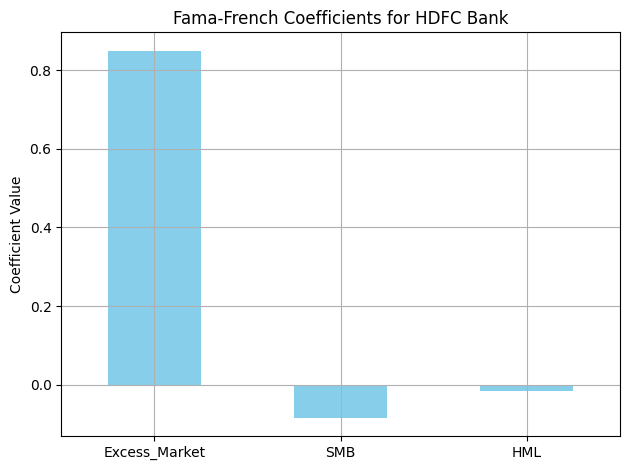

In [17]:
model.params[['Excess_Market', 'SMB', 'HML']].plot(kind='bar', color='skyblue', title='Fama-French Coefficients for HDFC Bank')
plt.ylabel("Coefficient Value")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



> Scatter Plot of Residuals Vs Fama-French Factors



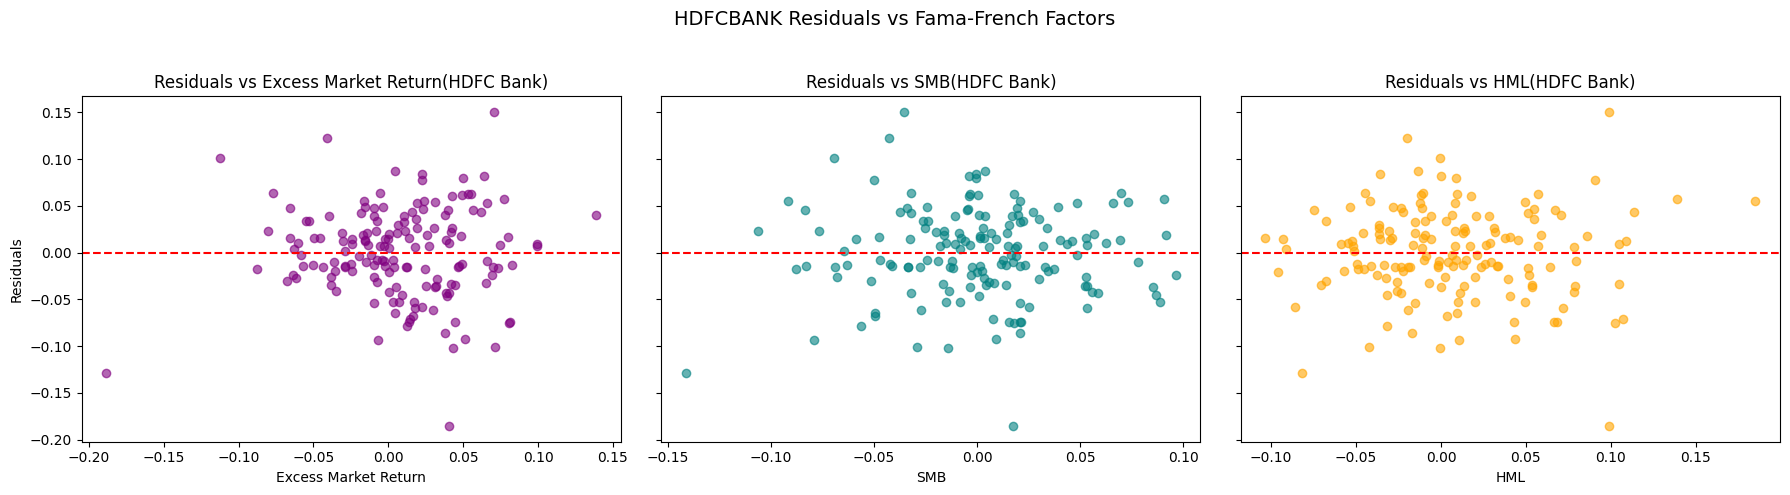

In [18]:
# Step 1: Predict Infosys excess return using the model
df['Predicted_Excess_HDFC'] = model.predict(X)

# Step 2: Calculate residuals
df['Residuals'] = y - df['Predicted_Excess_HDFC']

# Step 3: Plot residuals vs Excess Market Return

# Step 1: Set up figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot 1: Excess Market Return vs Residuals
axs[0].scatter(X['Excess_Market'], df['Residuals'], color='purple', alpha=0.6)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title('Residuals vs Excess Market Return(HDFC Bank)')
axs[0].set_xlabel('Excess Market Return')
axs[0].set_ylabel('Residuals')

# Plot 2: SMB vs Residuals
axs[1].scatter(X['SMB'], df['Residuals'], color='teal', alpha=0.6)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs SMB(HDFC Bank)')
axs[1].set_xlabel('SMB')

# Plot 3: HML vs Residuals
axs[2].scatter(X['HML'], df['Residuals'], color='orange', alpha=0.6)
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_title('Residuals vs HML(HDFC Bank)')
axs[2].set_xlabel('HML')

# Final adjustments
plt.suptitle("HDFCBANK Residuals vs Fama-French Factors", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



> Scatter Plot of Residuals Vs Predicted Excess Return



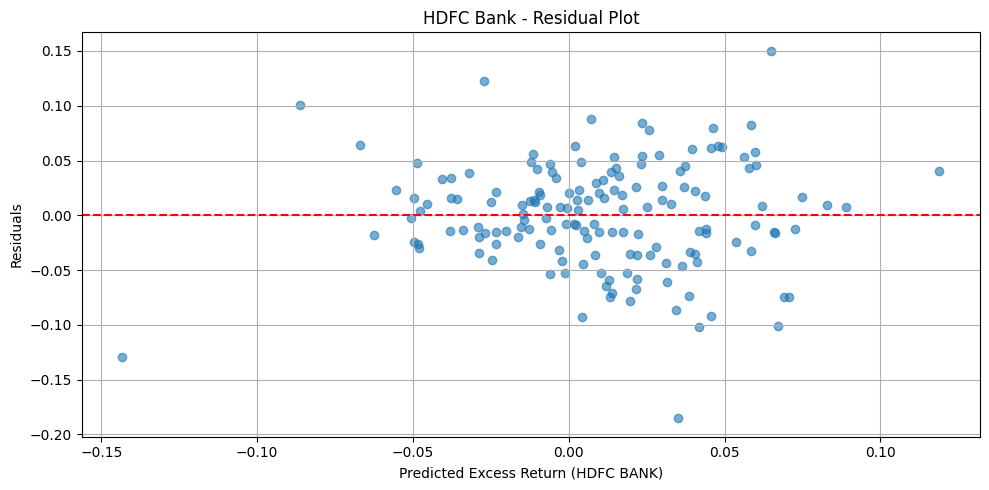

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(df['Predicted_Excess_HDFC'], df['Residuals'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("HDFC Bank - Residual Plot")
plt.xlabel("Predicted Excess Return (HDFC BANK)")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()



> Histogram of Residuals


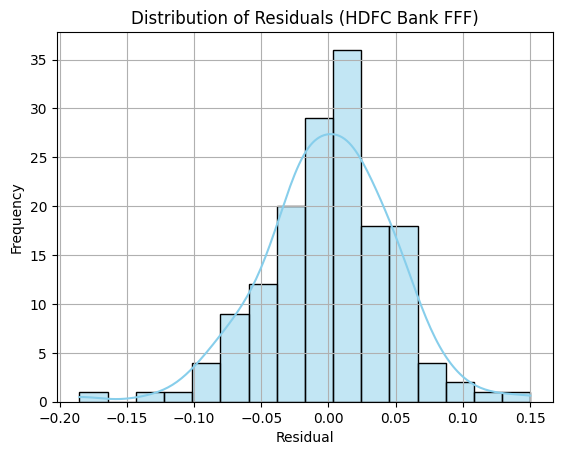

In [20]:
sns.histplot(df['Residuals'], kde=True, color='skyblue')
plt.title("Distribution of Residuals (HDFC Bank FFF)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



> Line Plot of Residuals Over Times



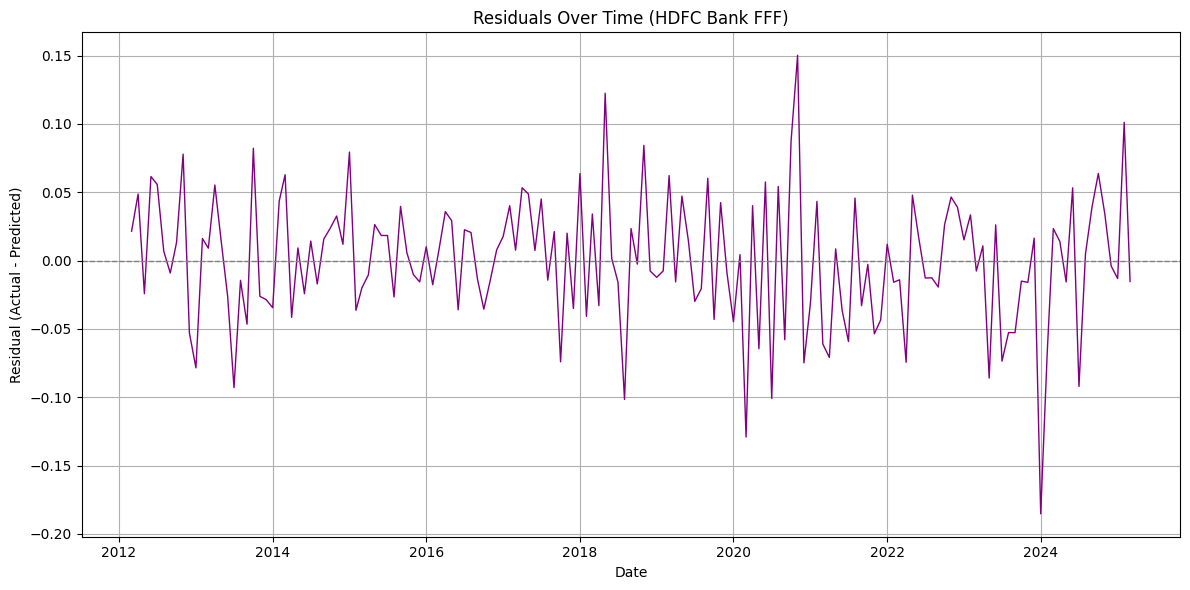

In [21]:
# Convert 'Date' to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date just in case
df = df.sort_values('Date')

# Plot residuals over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Residuals'], color='purple', linewidth=1)

# Add zero line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and formatting
plt.title("Residuals Over Time (HDFC Bank FFF)")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Line Plot of Actual Vs Predicted Excess Returns



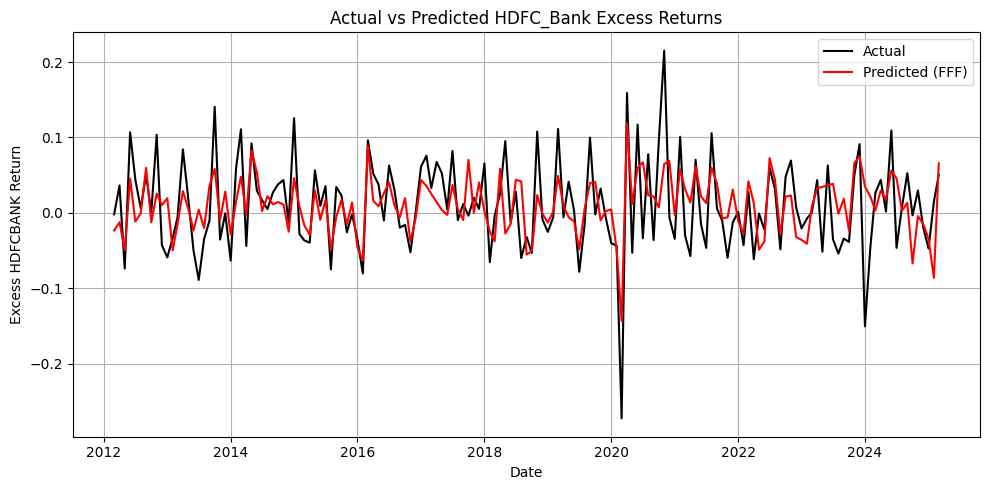

In [22]:
df['Predicted_Excess_HDFC'] = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Excess_HDFC'], label='Actual', color='black')
plt.plot(df['Date'], df['Predicted_Excess_HDFC'], label='Predicted (FFF)', color='red')
plt.title("Actual vs Predicted HDFC_Bank Excess Returns")
plt.xlabel("Date")
plt.ylabel("Excess HDFCBANK Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



> Reliance Stock




> Regression Fit



In [ ]:
df = pd.read_csv('/content/drive/My Drive/FFF_Project/Final_Datasets/Reliance/FFF_Dataset_RELI.csv')


# Define X and y
X = df[['Excess_Market', 'SMB', 'HML']]
y = df['Excess_RELI']

# Add constant to estimate alpha (intercept)
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit(cov_type= 'HC1')

# Show regression summary
print(model.summary())

# Print each coefficient separately
print("Intercept (Alpha):", model.params['const'])
print("Market Factor (Beta for Excess_Market):", model.params['Excess_Market'])
print("Size Factor (Beta for SMB):", model.params['SMB'])
print("Value Factor (Beta for HML):", model.params['HML'])

                            OLS Regression Results                            
Dep. Variable:            Excess_RELI   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     30.29
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           1.98e-15
Time:                        16:21:54   Log-Likelihood:                 232.45
No. Observations:                 157   AIC:                            -456.9
Df Residuals:                     153   BIC:                            -444.7
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0017      0.004      0.400



> Barplot of Model Coefficients



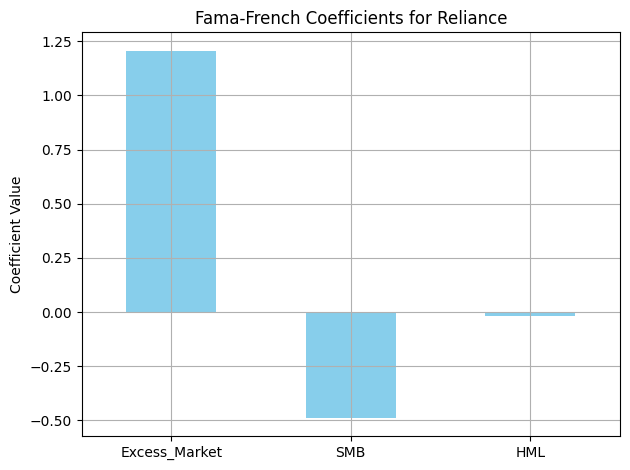

In [ ]:
model.params[['Excess_Market', 'SMB', 'HML']].plot(kind='bar', color='skyblue', title='Fama-French Coefficients for Reliance')
plt.ylabel("Coefficient Value")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



> Scatter Plot of Residuals Vs Fama-French Factors



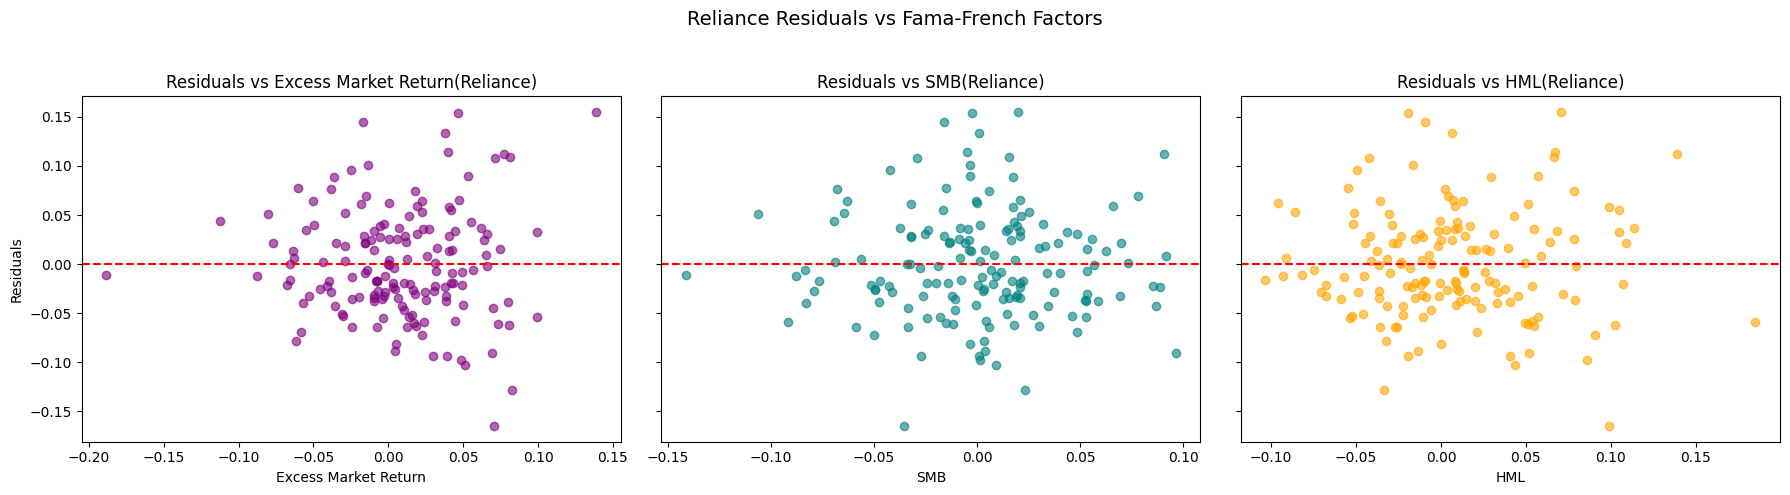

In [ ]:
# Step 1: Predict Infosys excess return using the model
df['Predicted_Excess_RELI'] = model.predict(X)

# Step 2: Calculate residuals
df['Residuals'] = y - df['Predicted_Excess_RELI']

# Step 3: Plot residuals vs Excess Market Return

# Step 1: Set up figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot 1: Excess Market Return vs Residuals
axs[0].scatter(X['Excess_Market'], df['Residuals'], color='purple', alpha=0.6)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title('Residuals vs Excess Market Return(Reliance)')
axs[0].set_xlabel('Excess Market Return')
axs[0].set_ylabel('Residuals')

# Plot 2: SMB vs Residuals
axs[1].scatter(X['SMB'], df['Residuals'], color='teal', alpha=0.6)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs SMB(Reliance)')
axs[1].set_xlabel('SMB')

# Plot 3: HML vs Residuals
axs[2].scatter(X['HML'], df['Residuals'], color='orange', alpha=0.6)
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_title('Residuals vs HML(Reliance)')
axs[2].set_xlabel('HML')

# Final adjustments
plt.suptitle("Reliance Residuals vs Fama-French Factors", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



> Scatter Plot of Residuals Vs Predicted Excess Return



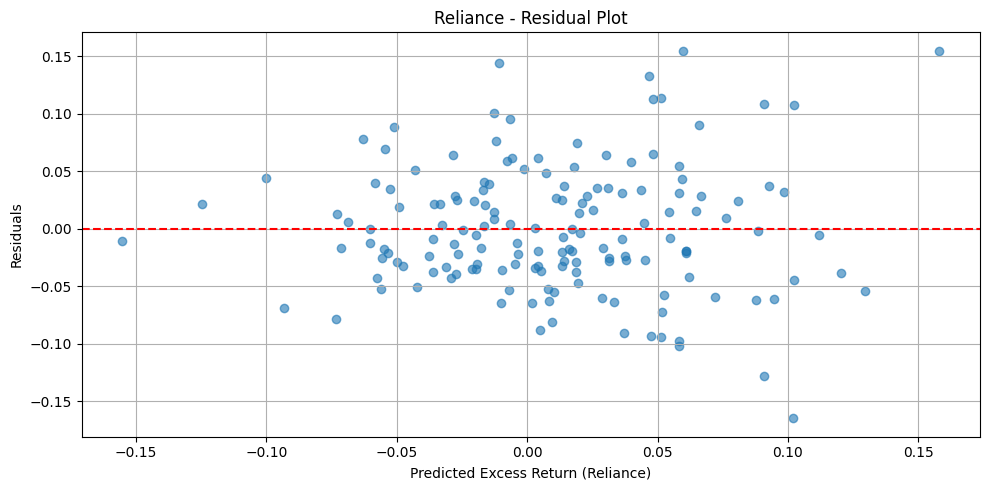

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df['Predicted_Excess_RELI'], df['Residuals'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Reliance - Residual Plot")
plt.xlabel("Predicted Excess Return (Reliance)")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()



> Histogram of Residuals



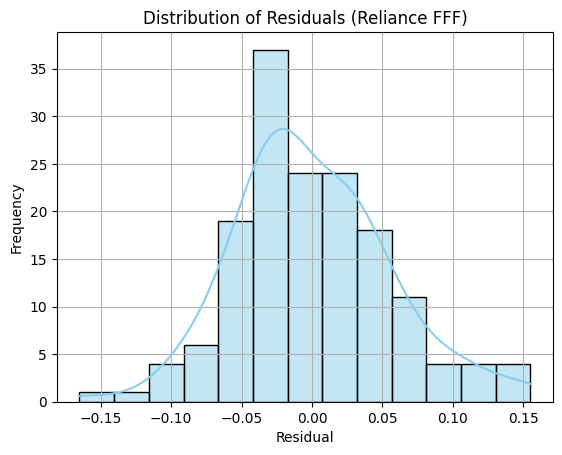

In [ ]:
sns.histplot(df['Residuals'], kde=True, color='skyblue')
plt.title("Distribution of Residuals (Reliance FFF)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



> Line Plot of Residuals Over Times



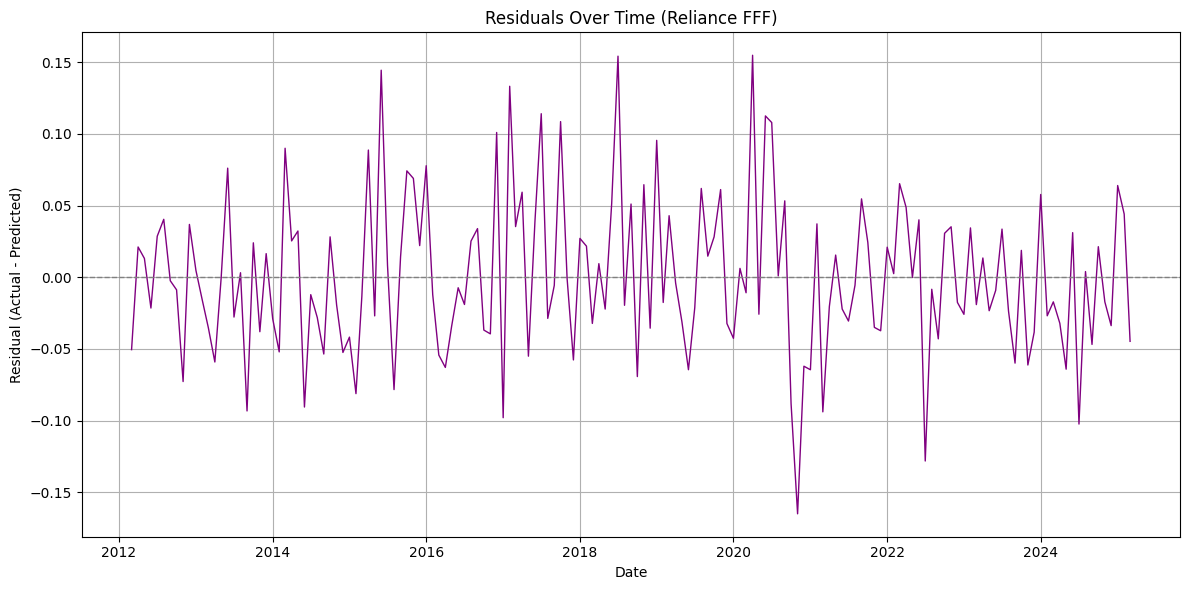

In [ ]:
# Convert 'Date' to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date just in case
df = df.sort_values('Date')

# Plot residuals over time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Residuals'], color='purple', linewidth=1)

# Add zero line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels and formatting
plt.title("Residuals Over Time (Reliance FFF)")
plt.xlabel("Date")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()



> Line Plot of Actual Vs Predicted Excess Returns



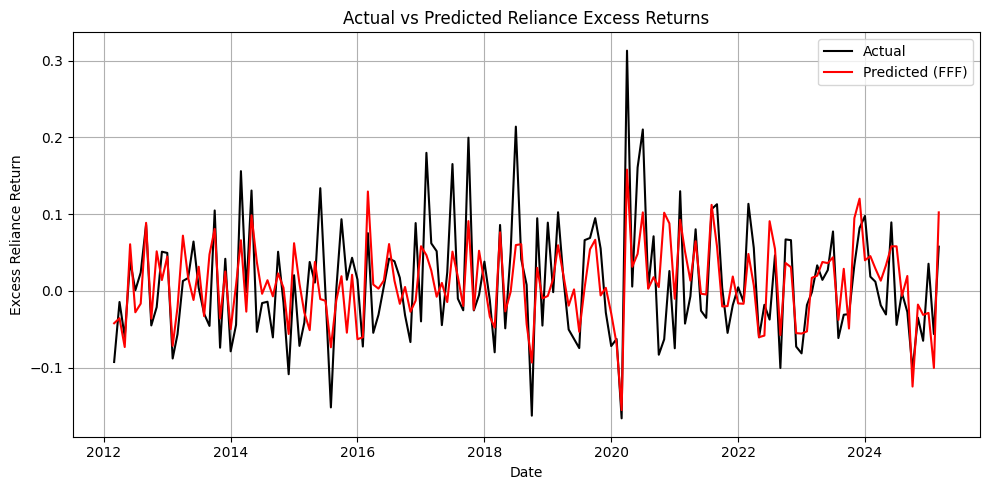

In [ ]:
df['Predicted_Excess_RELI'] = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Excess_RELI'], label='Actual', color='black')
plt.plot(df['Date'], df['Predicted_Excess_RELI'], label='Predicted (FFF)', color='red')
plt.title("Actual vs Predicted Reliance Excess Returns")
plt.xlabel("Date")
plt.ylabel("Excess Reliance Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()